# read outputs

In [1]:
import astropy.io.fits as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.fits as pf


def rebin(z_old, pdf_old, zbins):
        # spline
        kwargs_spline = {'s': 0,  # force spline to go through data points
                         'ext': 'zeros',  # ext=0 means extrapolate, =1 means return 0
                         'k': 3,
                        }
        spline = UnivariateSpline(z_old, pdf_old, **kwargs_spline)
        pdf = np.zeros(len(zbins) - 1)
        for i in range(len(zbins) - 1):
            zmin = zbins[i]
            zmax = zbins[i + 1]
            pdf[i] = spline.integral(zmin, zmax) #/ (zmax - zmin)
        return pdf
    
def compute_mean(z0,nz0):
    norm0 = 0.
    mean0 = 0.
    for kk in range(len(z0)):
        norm0+=nz0[kk]
        mean0+=nz0[kk]*z0[kk]
    return mean0/norm0
 
    
def compute_std(z0,nz0):
    norm0 = 0.
    mean0 = 0.
    std = 0.
    for kk in range(len(z0)):
        norm0+=nz0[kk]
        mean0+=nz0[kk]*z0[kk]
    mean0 = mean0/norm0
    norm0 = 0.
    for kk in range(len(z0)):
        norm0+=nz0[kk]
        std+=nz0[kk]*(z0[kk]-mean0)**2
    if std>0.and norm0>0.:
        return  np.sqrt(std/norm0)
    else:
    
        return 0.

In [2]:
import pickle 
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol = 2)
        f.close()
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        mute =  pickle.load(f)
        f.close()
    return mute

In [3]:
measured_wz = load_obj('/global/homes/m/mgatti/clustering-z/WZ_cosmosis1')

In [4]:
bbb = np.linspace(0.15, 0.95, 26)
print bbb, len(bbb)

eee = np.linspace(0.1, 1.1, 16)
print eee, len(eee)

zbins_c = bbb[:-1]+ 0.5*(bbb[1]-bbb[0])
print zbins_c, len(zbins_c)

zbinse_c = eee[:-1]+ 0.5*(eee[1]-eee[0])
print zbinse_c, len(zbinse_c)

[0.15  0.182 0.214 0.246 0.278 0.31  0.342 0.374 0.406 0.438 0.47  0.502
 0.534 0.566 0.598 0.63  0.662 0.694 0.726 0.758 0.79  0.822 0.854 0.886
 0.918 0.95 ] 26
[0.1        0.16666667 0.23333333 0.3        0.36666667 0.43333333
 0.5        0.56666667 0.63333333 0.7        0.76666667 0.83333333
 0.9        0.96666667 1.03333333 1.1       ] 16
[0.166 0.198 0.23  0.262 0.294 0.326 0.358 0.39  0.422 0.454 0.486 0.518
 0.55  0.582 0.614 0.646 0.678 0.71  0.742 0.774 0.806 0.838 0.87  0.902
 0.934] 25
[0.13333333 0.2        0.26666667 0.33333333 0.4        0.46666667
 0.53333333 0.6        0.66666667 0.73333333 0.8        0.86666667
 0.93333333 1.         1.06666667] 15


## sompz

In [266]:
template = pf.open('/global/homes/g/giannini/clustering-z/template_source_nzs_for_mastercat_12_3_19.fits')

In [6]:
nz_sompz = pd.DataFrame(template[6].data)

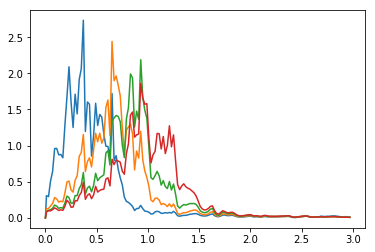

In [114]:
for i in range(4):
    #integral = np.trapz(nz_sompz['BIN{0}'.format(i)], x = np.linspace(0.15, 0.95-0.033333333333, 24) )
    plt.plot(nz_sompz['Z_MID'], nz_sompz['BIN{0}'.format(i+1)])

In [44]:
len(nz_sompz['Z_MID']), len(nz_sompz['BIN1'])

(150, 150)

In [12]:
#def rebin(z_old, pdf_old, zbins)
from scipy.interpolate import UnivariateSpline

nz_sompz_25bins = np.empty(shape=(4,25))
nz_sompz_15bins = np.empty(shape=(4,15))
for i in range(4):
    nz_sompz_25bins[i] = rebin(nz_sompz['Z_MID'], nz_sompz['BIN{0}'.format(i+1)], bbb)
    nz_sompz_15bins[i] = rebin(nz_sompz['Z_MID'], nz_sompz['BIN{0}'.format(i+1)], eee)

print len(nz_sompz_15bins[0])

15


In [63]:
new_sompz_ = pf.open('/global/cscratch1/sd/jmyles/sompz_buzzard/v0.21/y3_redshift_distributions_v0.21_modal_even.fits')

In [66]:
new_sompz = pd.DataFrame(new_sompz[1].data)

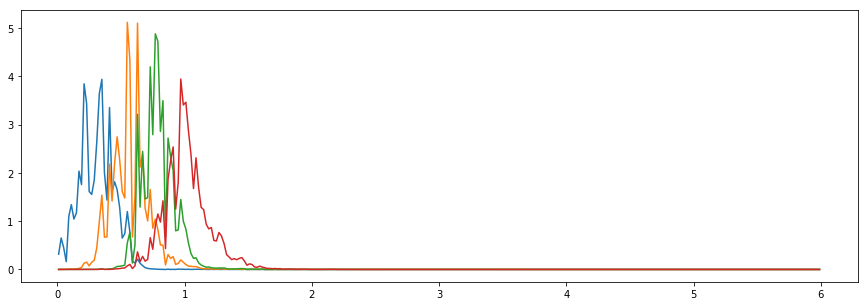

In [72]:
plt.figure(figsize=(15,5))
for i in range(4):
    #integral = np.trapz(nz_sompz['BIN{0}'.format(i)], x = np.linspace(0.15, 0.95-0.033333333333, 24) )

    plt.plot(new_sompz['Z_MID'], new_sompz['BIN{0}'.format(i+1)])


### rm

In [105]:
import sys

sys.path.insert(0, '/global/homes/g/giannini/clustering-z/WZ_utils/')
from covariance_routines import *
from load_routines import *

n_jck=100
gamma = 1
zmin=0.15
zmax=0.95
bins = 25
ang_bins = 8

folder_rm_w_r = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_rmg_R_w/"
folder_rm_now_r = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_rmg_R/"
folder_rm_w_nor = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_rmg_w/"
folder_rm_now_nor = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_rmg/"
folder_rm_large = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_rmg_R_w_1500_5000/"
folder_eboss_25 = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_eboss_R_w_25_rm/"


folder_rm_w_r = read_results_fast(folder_rm_w_r,n_jck,gamma,ang_bins)
folder_rm_now_r = read_results_fast(folder_rm_now_r,n_jck,gamma,ang_bins)
folder_rm_w_nor = read_results_fast(folder_rm_w_nor,n_jck,gamma,ang_bins)
folder_rm_now_nor = read_results_fast(folder_rm_now_nor,n_jck,gamma,ang_bins)
folder_rm_large = read_results_fast(folder_rm_large,n_jck,gamma,ang_bins)
folder_eboss_25 = read_results_fast(folder_eboss_25,n_jck,gamma,ang_bins)


#runs = [folder_true_mag, folder_rm_mag]
runs = [folder_rm_w_r, folder_rm_now_r, folder_rm_w_nor, folder_rm_now_nor, folder_rm_large, folder_eboss_25]

print ("done")

done


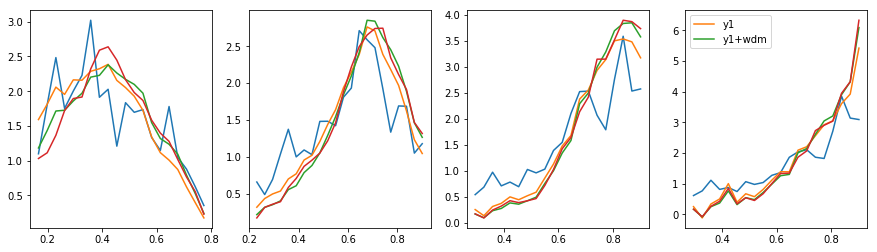

In [53]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))

for i in range(4):
    miau = dict()
    miao = dict()
    int_sompz = np.trapz(nz_sompz_25bins[i][:24][mask_rm[i]], x = zbins_c[:24][mask_rm[i]])
    ax[i].plot(zbins_c[:24][mask_rm[i]], nz_sompz_25bins[i][:24][mask_rm[i]]/int_sompz)

    ax[i].plot(zbins_c[:24][mask_rm[i]], runs[0]['Nz'][i,:24,0][mask_rm[i]]/(integral1[0][i]),label='y1')

    ax[i].plot(zbins_c[:24][mask_rm[i]], runs[0]['Nz'][i,:24,0][mask_rm[i]]/(measured_wz['th_correction'][mask_rm[i]]*integral2[0][i]),label='y1+wdm')
    
    ax[i].plot(zbins_c[:24][mask_rm[i]], runs[0]['Nz'][i,:24,0][mask_rm[i]]/(np.sqrt(runs[0]['bz'][i,:24,0][mask_rm[i]]*measured_wz['th_correction'][mask_rm[i]])*integral[0][i]))
    
plt.legend()

### eboss

In [60]:
import sys

sys.path.insert(0, '/global/homes/g/giannini/clustering-z/WZ_utils/')
from covariance_routines import *
from load_routines import *

[0.1,1.1,15] 
n_jck=100
gamma = 1
zmin=0.1
zmax=1.1
bins = 15
ang_bins = 8

folder_eboss_w_r = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_eboss_R_w/"
folder_eboss_now_r = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_eboss_R/"
folder_eboss_w_nor = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_eboss_w/"
folder_eboss_now_nor = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_eboss/"
#/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_eboss_R_w_random_wrong
folder_eboss_large = "/global/cscratch1/sd/mgatti/clustering_z/mastercat_12_3_19_eboss_R_w_1500_5000/"

folder_eboss_w_r = read_results_fast(folder_eboss_w_r,n_jck,gamma,ang_bins)
folder_eboss_now_r = read_results_fast(folder_eboss_now_r,n_jck,gamma,ang_bins)
folder_eboss_w_nor = read_results_fast(folder_eboss_w_nor,n_jck,gamma,ang_bins)
folder_eboss_now_nor = read_results_fast(folder_eboss_now_nor,n_jck,gamma,ang_bins)
folder_eboss_large = read_results_fast(folder_eboss_large,n_jck,gamma,ang_bins)

# # #runs = [folder_true_mag, folder_rm_mag]
runs_eboss = [folder_eboss_w_r, folder_eboss_w_nor, folder_eboss_now_r, folder_eboss_now_nor, folder_eboss_large]

print ("done")

done


In [20]:
zbinse_c = zbinse_c[:14]

bin  0
bin  1
bin  2
bin  3


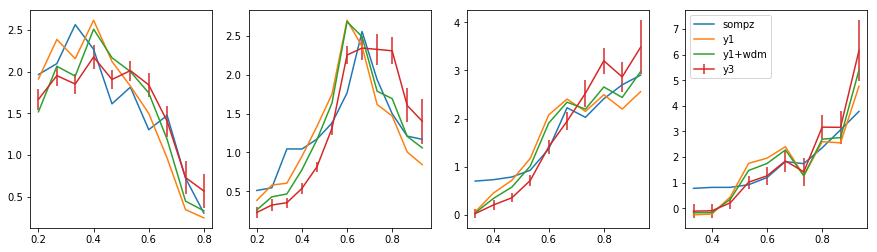

In [51]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))


for i in range(4):
    print 'bin ', i
    miau = dict()
    miao = dict()
    int_sompz = np.trapz(nz_sompz_15bins[i][:14][mask_eboss[i]], x = zbinse_c[mask_eboss[i]])
    ax[i].plot(zbinse_c[mask_eboss[i]], nz_sompz_15bins[i][:14][mask_eboss[i]]/int_sompz, label = 'sompz')

    ax[i].plot(zbinse_c[mask_eboss[i]], runs_eboss[0]['Nz'][i,:14,0][mask_eboss[i]]/(int_eboss1[0][i]),label='y1')

    ax[i].plot(zbinse_c[mask_eboss[i]], runs_eboss[0]['Nz'][i,:14,0][mask_eboss[i]]/(measured_wz['th_correction_eboss'][mask_eboss[i]]*int_eboss2[0][i]),label='y1+wdm')

    ax[i].errorbar(zbinse_c[mask_eboss[i]], runs_eboss[0]['Nz'][i,:14,0][mask_eboss[i]]/(np.sqrt(runs_eboss[0]['bz'][i,:14,0][mask_eboss[i]]*measured_wz['th_correction_eboss'][mask_eboss[i]])*int_eboss[0][i]), cov_jck_eboss[0][i]['y3']['err'][:14][mask_eboss[i]]/(np.sqrt(measured_wz['th_correction_eboss'][mask_eboss[i]])*int_eboss[0][i]), label = 'y3')
    
    
plt.legend()

# mean

### covariance_jck

In [223]:
cov_jck_rm = dict()

for i in range(len(runs)):
    meow = dict()
    for t in range(4):
        mute = dict()
        mute['y1'] = covariance_jck(runs[i]['Nz'][t,:,1:], 100, 'jackknife')
        mute['y1w'] = covariance_jck((runs[i]['Nz'][t,:,1:]/runs[i]['bz'][t,:,1:]), 100, 'jackknife')
        mute['y3'] = covariance_jck((runs[i]['Nz'][t,:,1:]/np.sqrt(runs[i]['bz'][t,:,1:])), 100, 'jackknife')#/np.sqrt(new_w_dm_z_weighted[t]))
        meow[t] = mute
    cov_jck_rm[i] = meow
    
cov_jck_eboss = dict()

for i in range(len(runs_eboss)):
    meow = dict()
    for t in range(4):
        mute = dict()
        mute['y1'] = covariance_jck(runs_eboss[i]['Nz'][t,:,1:], 100, 'jackknife')
        mute['y1w'] = covariance_jck((runs_eboss[i]['Nz'][t,:,1:]/runs_eboss[i]['bz'][t,:,1:]), 100, 'jackknife')
        mute['y3'] = covariance_jck((runs_eboss[i]['Nz'][t,:,1:]/np.sqrt(runs_eboss[i]['bz'][t,:,1:])), 100, 'jackknife')#/np.sqrt(new_w_dm_z_weighted[t]))
        meow[t] = mute
    cov_jck_eboss[i] = meow

In [224]:
cov_bias_rm = dict()
cov_bias_eboss = dict()

for j in range(len(runs)):
    meow = dict()
    for i in range(4):
        meow[i] = covariance_jck(runs[0]['bz'][0,:24,1:], 100, 'jackknife')
    cov_bias_rm[j] = meow  
    
    
for j in range(len(runs_eboss)):
    meow = dict()
    for i in range(4):
        meow[i] = covariance_jck(runs_eboss[0]['bz'][0,:14,1:], 100, 'jackknife')
    cov_bias_eboss[j] = meow 

### integrals

In [193]:
integral = np.zeros(shape=(len(runs),4))
integral1 = np.zeros(shape=(len(runs),4))
integral2 = np.zeros(shape=(len(runs),4))
mask_rm = dict()

# normalising over the interval: -2\sigma < sompz_mean < 2\sigma
for j in range(len(runs)):
    for i in range(4):
        sompz_mean = compute_mean(zbins_c[:24], nz_sompz_25bins[i][:24])
        sompz_std = compute_std(zbins_c[:24], nz_sompz_25bins[i][:24])
        #print sompz_mean + 2*sompz_std
        mask = (zbins_c[:24] < sompz_mean + 2*sompz_std) & (zbins_c[:24] > sompz_mean - 2*sompz_std)
        #print mask_2s, len(mask_2s)
        mask = mask.astype(bool)
        mask_rm[i] = mask
        #print mask, mask_rm[i]
        integral[j][i] = np.trapz(runs[j]['Nz'][i,:24,0][mask]/(np.sqrt(runs[j]['bz'][i,:24,0][mask]*measured_wz['th_correction'][mask])), x = zbins_c[:24][mask] )
        integral1[j][i] = np.trapz(runs[j]['Nz'][i,:24,0][mask], x = zbins_c[:24][mask] )
        integral2[j][i] = np.trapz(runs[j]['Nz'][i,:24,0][mask]/(measured_wz['th_correction'][mask]), x = zbins_c[:24][mask] )
        
int_eboss = np.zeros(shape=(len(runs_eboss),4))
int_eboss1 = np.zeros(shape=(len(runs_eboss),4))
int_eboss2 = np.zeros(shape=(len(runs_eboss),4))
mask_eboss = dict()

for j in range(len(runs_eboss)):
    for i in range(4):
        sompz_mean = compute_mean(zbinse_c[:14], nz_sompz_15bins[i][:14])
        sompz_std = compute_std(zbinse_c[:14], nz_sompz_15bins[i][:14])
        #print sompz_mean + 2*sompz_std
        mask = (zbinse_c[:14] < sompz_mean + 2*sompz_std) & (zbinse_c[:14] > sompz_mean - 2*sompz_std) & (zbinse_c[:14]< zbins_c[-1]) & (zbinse_c[:14]> zbins_c[0])
        mask = mask.astype(bool)
        mask_eboss[i] = mask
        int_eboss[j][i] = np.trapz(runs_eboss[j]['Nz'][i,:14,0][mask]/(np.sqrt(runs_eboss[j]['bz'][i,:14,0][mask]*measured_wz['th_correction_eboss'][mask])), x = zbinse_c[:14][mask] )
        int_eboss1[j][i] = np.trapz(runs_eboss[j]['Nz'][i,:14,0][mask], x = zbinse_c[:14][mask] )
        int_eboss2[j][i] = np.trapz(runs_eboss[j]['Nz'][i,:14,0][mask]/measured_wz['th_correction_eboss'][mask], x = zbinse_c[:14][mask] )


### means

In [217]:
#redmagic
print 'redmagic'
meanz = dict()

for i in range(4):
    #print i
    miao = dict()

    miao['y1mean'] = compute_mean(zbins_c[:24], runs[0]['Nz'][i,:24,0])
    miao['y1std'] = compute_std(zbins_c[:24], runs[0]['Nz'][i,:24,0])
    #print miao['y1mean'], miao['y1std']
    mask = (zbins_c[:24] < (miao['y1mean']+2*miao['y1std'])) &  (zbins_c[:24] > (miao['y1mean']-2*miao['y1std']))
    #print mask, len(mask)
    miao['y1mean_2s'] = compute_mean(zbins_c[:24][mask], runs[0]['Nz'][i,:24,0][mask])
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbins_c[:24][mask], (runs[0]['Nz'][i,:24,j+1])[mask]) 
    miao['y1mean_2s_err'] = covariance_scalar_jck(b,100,'jackknife')
    
    miao['y1wmean'] = compute_mean(zbins_c[:24], runs[0]['Nz'][i,:24,0]/(measured_wz['th_correction']))
    miao['y1wstd'] = compute_std(zbins_c[:24], runs[0]['Nz'][i,:24,0]/(measured_wz['th_correction']))
    #print miao['y1wmean'], miao['y1wstd']
    mask = (zbins_c[:24] < (miao['y1wmean']+2*miao['y1wstd'])) &  (zbins_c[:24] > (miao['y1wmean']-2*miao['y1wstd']))
    #print mask, len(mask)
    miao['y1wmean_2s'] = compute_mean(zbins_c[:24][mask], (runs[0]['Nz'][i,:24,0]/(measured_wz['th_correction']))[mask])
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbins_c[:24][mask], (runs[0]['Nz'][i,:24,j+1]/measured_wz['th_correction'])[mask]) 
    miao['y1wmean_2s_err'] = covariance_scalar_jck(b,100,'jackknife')
    
    miao['y3mean'] = compute_mean(zbins_c[:24], runs[0]['Nz'][i,:24,0]/(np.sqrt(runs[0]['bz'][i,:24,0]*measured_wz['th_correction'])))
    miao['y3std'] = compute_std(zbins_c[:24], runs[0]['Nz'][i,:24,0]/(np.sqrt(runs[0]['bz'][i,:24,0]*measured_wz['th_correction'])))
    #print miao['y3mean'], miao['y3std']
    mask = (zbins_c[:24] < (miao['y3mean']+2*miao['y3std'])) &  (zbins_c[:24] > (miao['y3mean']-2*miao['y3std']))
    #print mask, len(mask)
    miao['y3mean_2s'] = compute_mean(zbins_c[:24][mask], (runs[0]['Nz'][i,:24,0]/(np.sqrt(runs[0]['bz'][i,:24,0]*measured_wz['th_correction'])))[mask])
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbins_c[:24][mask], (runs[0]['Nz'][i,:24,j+1]/(np.sqrt(runs[0]['bz'][i,:24,j+1]*measured_wz['th_correction'])))[mask]) 
    miao['y3mean_2s_err'] = covariance_scalar_jck(b,100,'jackknife')
    
    miao['y3mean_l'] = compute_mean(zbins_c[:24], runs[4]['Nz'][i,:24,0]/(np.sqrt(runs[4]['bz'][i,:24,0]*measured_wz['th_correction'])))
    miao['y3std_l'] = compute_std(zbins_c[:24], runs[4]['Nz'][i,:24,0]/(np.sqrt(runs[4]['bz'][i,:24,0]*measured_wz['th_correction'])))
    #print miao['y3mean'], miao['y3std']
    mask = (zbins_c[:24] < (miao['y3mean_l']+2*miao['y3std_l'])) &  (zbins_c[:24] > (miao['y3mean_l']-2*miao['y3std_l']))
    #print mask, len(mask)
    miao['y3mean_2s_l'] = compute_mean(zbins_c[:24][mask], (runs[4]['Nz'][i,:24,0]/(np.sqrt(runs[4]['bz'][i,:24,0]*measured_wz['th_correction'])))[mask])
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbins_c[:24][mask], (runs[0]['Nz'][i,:24,j+1]/(np.sqrt(runs[0]['bz'][i,:24,j+1]*measured_wz['th_correction'])))[mask]) 
    miao['y3mean_2s_err_l'] = covariance_scalar_jck(b,100,'jackknife')
    
    miao['sompz_std'] = compute_std(zbins_c[:24], nz_sompz_25bins[i][:24])
    miao['sompz_mean'] = compute_mean(zbins_c[:24], nz_sompz_25bins[i][:24])
    #mask_sompz = (zbins_c[:24] < (miao['sompz_mean']+2*miao['sompz_std'])) &  (zbins_c[:24] > (miao['sompz_mean']-2*miao['sompz_std']))
    miao['sompz_mean2s'] = compute_mean(zbins_c[:24][mask], nz_sompz_25bins[i][:24][mask])
    
    
    meanz[i] = miao


redmagic


In [219]:
for i in range(4):
    print '\n', i
    print 'y1'
    print 'shift    {0:2.3f}'.format(meanz[i]['y1mean_2s']-meanz[i]['sompz_mean2s'])
    print 'mean     {0:2.3f}'.format(meanz[i]['y1mean_2s'])
    print 'meanerr  {0:2.4f}'.format(meanz[i]['y1mean_2s_err']['err'])
    print 'std      {0:2.3f}'.format(meanz[i]['y1std'])
    #print 'y1  ',  meanz[i]['y1mean_2s']-meanz[i]['sompz_mean2s']
    print 'y1w'
    print 'shift    {0:2.3f}'.format(meanz[i]['y1wmean_2s']-meanz[i]['sompz_mean2s'])
    print 'mean     {0:2.3f}'.format(meanz[i]['y1wmean_2s'])
    print 'meanerr  {0:2.4f}'.format(meanz[i]['y1wmean_2s_err']['err'])
    print 'std      {0:2.3f}'.format(meanz[i]['y1std'])
    #print 'y1w ',  meanz[i]['y1wmean_2s']-meanz[i]['sompz_mean2s']
    print 'y3'
    print 'shift    {0:2.3f}'.format(meanz[i]['y3mean_2s']-meanz[i]['sompz_mean2s'])
    print 'mean     {0:2.3f}'.format(meanz[i]['y3mean_2s'])
    print 'meanerr  {0:2.4f}'.format(meanz[i]['y3mean_2s_err']['err'])
    print 'std      {0:2.3f}'.format(meanz[i]['y3std'])
    
    print 'y3 1.5-5 Mpc'
    print 'shift    {0:2.3f}'.format(meanz[i]['y3mean_2s_l']-meanz[i]['sompz_mean2s'])
    print 'mean     {0:2.3f}'.format(meanz[i]['y3mean_2s_l'])
    print 'meanerr  {0:2.4f}'.format(meanz[i]['y3mean_2s_err_l']['err'])
    print 'std      {0:2.3f}'.format(meanz[i]['y3std_l'])
    #print 'y3  ',  meanz[i]['y3mean_2s']-meanz[i]['sompz_mean2s']


0
y1
shift    -0.022
mean     0.398
meanerr  0.0020
std      0.147
y1w
shift    0.005
mean     0.425
meanerr  0.0021
std      0.147
y3
shift    0.010
mean     0.429
meanerr  0.0019
std      0.142
y3 1.5-5 Mpc
shift    0.030
mean     0.450
meanerr  0.0020
std      0.150

1
y1
shift    0.005
mean     0.648
meanerr  0.0016
std      0.172
y1w
shift    0.032
mean     0.675
meanerr  0.0012
std      0.172
y3
shift    0.030
mean     0.672
meanerr  0.0013
std      0.162
y3 1.5-5 Mpc
shift    0.037
mean     0.679
meanerr  0.0013
std      0.163

2
y1
shift    0.024
mean     0.751
meanerr  0.0016
std      0.149
y1w
shift    0.037
mean     0.764
meanerr  0.0013
std      0.149
y3
shift    0.038
mean     0.765
meanerr  0.0015
std      0.139
y3 1.5-5 Mpc
shift    0.036
mean     0.763
meanerr  0.0017
std      0.155

3
y1
shift    0.051
mean     0.769
meanerr  0.0041
std      0.140
y1w
shift    0.065
mean     0.783
meanerr  0.0032
std      0.140
y3
shift    0.066
mean     0.784
meanerr  0.0032
std     

In [220]:
#eboss
print 'eboss'
meanz_eboss = dict()


for i in range(4):
    #print 'bin ', i
    miao = dict()

    miao['y1mean'] = compute_mean(zbinse_c, runs_eboss[0]['Nz'][i,:14,0])
    miao['y1std'] = compute_std(zbinse_c, runs_eboss[0]['Nz'][i,:14,0])
    #print 'y1', miao['y1mean']
    #print runs_eboss[0]['Nz'][i,:14,0]/(int_eboss1[0][i]), miao['y1std']
    mask = (zbinse_c < (miao['y1mean']+2*miao['y1std'])) &  (zbinse_c > (miao['y1mean']-2*miao['y1std']))
    #print mask, len(mask)
    miao['y1mean_2s'] = compute_mean(zbinse_c[mask], (runs_eboss[0]['Nz'][i,:14,0]/(int_eboss1[0][i]))[mask])
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbinse_c[:14][mask], (runs_eboss[0]['Nz'][i,:14,j+1][mask])) 
    miao['y1mean_2s_err'] = covariance_scalar_jck(b,100,'jackknife')
   
    
    miao['y1wmean'] = compute_mean(zbinse_c, runs_eboss[0]['Nz'][i,:14,0]/(measured_wz['th_correction_eboss']))
    miao['y1wstd'] = compute_std(zbinse_c, runs_eboss[0]['Nz'][i,:14,0]/(measured_wz['th_correction_eboss']))
    #print 'y1w', miao['y1wmean'], miao['y1wstd']
    mask = (zbinse_c < (miao['y1wmean']+2*miao['y1wstd'])) &  (zbinse_c > (miao['y1wmean']-2*miao['y1wstd']))
    #print mask, len(mask)
    miao['y1wmean_2s'] = compute_mean(zbinse_c[mask], (runs_eboss[0]['Nz'][i,:14,0]/(measured_wz['th_correction_eboss']))[mask])
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbinse_c[:14][mask], (runs_eboss[0]['Nz'][i,:14,j+1]/measured_wz['th_correction_eboss'])[mask])
    miao['y1wmean_2s_err'] = covariance_scalar_jck(b,100,'jackknife')
   
                            
    miao['y3mean'] = compute_mean(zbinse_c, runs_eboss[0]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[0]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])))
    miao['y3std'] = compute_std(zbinse_c, runs_eboss[0]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[0]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])))
    #print miao['y3mean'], miao['y3std']
    mask = (zbinse_c < (miao['y3mean']+2*miao['y3std'])) &  (zbinse_c> (miao['y3mean']-2*miao['y3std']))
   #print mask, len(mask)
    miao['y3mean_2s'] = compute_mean(zbinse_c[mask], (runs_eboss[0]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[0]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])))[mask])
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbinse_c[:14][mask], (runs_eboss[0]['Nz'][i,:14,j+1]/(np.sqrt(runs_eboss[0]['bz'][i,:14,j+1]*measured_wz['th_correction_eboss'])))[mask]) 
    miao['y3mean_2s_err'] = covariance_scalar_jck(b,100,'jackknife')

    miao['y3mean_l'] = compute_mean(zbinse_c, runs_eboss[4]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[4]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])))
    miao['y3std_l'] = compute_std(zbinse_c, runs_eboss[4]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[4]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])))
    #print miao['y3mean'], miao['y3std']
    mask = (zbinse_c < (miao['y3mean_l']+2*miao['y3std_l'])) &  (zbinse_c> (miao['y3mean_l']-2*miao['y3std_l']))
   #print mask, len(mask)
    miao['y3mean_2s_l'] = compute_mean(zbinse_c[mask], (runs_eboss[4]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[4]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])))[mask])    
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbinse_c[:14][mask], (runs_eboss[0]['Nz'][i,:14,j+1]/(np.sqrt(runs_eboss[0]['bz'][i,:14,j+1]*measured_wz['th_correction_eboss'])))[mask]) 
    miao['y3mean_2s_err_l'] = covariance_scalar_jck(b,100,'jackknife')
    
    miao['sompz_std'] = compute_std(zbinse_c[:14], nz_sompz_15bins[i][:14])
    miao['sompz_mean'] = compute_mean(zbinse_c[:14], nz_sompz_15bins[i][:14])
    #mask_sompz = (zbins_c[:24] < (miao['sompz_mean']+2*miao['sompz_std'])) &  (zbins_c[:24] > (miao['sompz_mean']-2*miao['sompz_std']))
    miao['sompz_mean2s'] = compute_mean(zbinse_c[:14][mask], nz_sompz_15bins[i][:14][mask])
    
    
    meanz_eboss[i] = miao
    
    

eboss


In [221]:
for i in range(4):
    print '\n', i
    print 'y1'
    print 'shift    {0:2.3f}'.format(meanz_eboss[i]['y1mean_2s']-meanz_eboss[i]['sompz_mean2s'])
    print 'mean     {0:2.3f}'.format(meanz_eboss[i]['y1mean_2s'])
    print 'meanerr  {0:2.4f}'.format(meanz_eboss[i]['y1mean_2s_err']['err'])
    print 'std      {0:2.3f}'.format(meanz_eboss[i]['y1std'])
    #print 'y1  ',  meanz[i]['y1mean_2s']-_ebossmeanz[i]['sompz_mean2s']
    print 'y1w'
    print 'shift    {0:2.3f}'.format(meanz_eboss[i]['y1wmean_2s']-meanz_eboss[i]['sompz_mean2s'])
    print 'mean     {0:2.3f}'.format(meanz_eboss[i]['y1wmean_2s'])
    print 'meanerr  {0:2.4f}'.format(meanz_eboss[i]['y1wmean_2s_err']['err'])
    print 'std      {0:2.3f}'.format(meanz_eboss[i]['y1std'])
    #print 'y1w ',  meanz[i]['y1wmean_2s']_eboss-meanz[i]['sompz_mean2s']
    print 'y3'
    print 'shift    {0:2.3f}'.format(meanz_eboss[i]['y3mean_2s']-meanz_eboss[i]['sompz_mean2s'])
    print 'mean     {0:2.3f}'.format(meanz_eboss[i]['y3mean_2s'])
    print 'meanerr  {0:2.4f}'.format(meanz_eboss[i]['y3mean_2s_err']['err'])
    print 'std      {0:2.3f}'.format(meanz_eboss[i]['y3std'])
    
    print 'y3 1.5-5 Mpc'
    print 'shift    {0:2.3f}'.format(meanz_eboss[i]['y3mean_2s_l']-meanz_eboss[i]['sompz_mean2s'])
    print 'mean     {0:2.3f}'.format(meanz_eboss[i]['y3mean_2s_l'])
    print 'meanerr  {0:2.4f}'.format(meanz_eboss[i]['y3mean_2s_err_l']['err'])
    print 'std      {0:2.3f}'.format(meanz_eboss[i]['y3std_l'])
    #print 'y3  ',  meanz[i]['y3mean_2s']-meanz[i]['sompz_mean2s']


0
y1
shift    -0.015
mean     0.401
meanerr  0.0050
std      0.202
y1w
shift    0.020
mean     0.436
meanerr  0.0064
std      0.202
y3
shift    0.053
mean     0.469
meanerr  0.0113
std      0.241
y3 1.5-5 Mpc
shift    0.036
mean     0.453
meanerr  0.0086
std      0.209

1
y1
shift    -0.019
mean     0.643
meanerr  0.0068
std      0.200
y1w
shift    0.018
mean     0.680
meanerr  0.0068
std      0.200
y3
shift    0.057
mean     0.718
meanerr  0.0082
std      0.192
y3 1.5-5 Mpc
shift    0.061
mean     0.723
meanerr  0.0082
std      0.198

2
y1
shift    -0.012
mean     0.757
meanerr  0.0086
std      0.194
y1w
shift    0.007
mean     0.776
meanerr  0.0080
std      0.194
y3
shift    0.039
mean     0.808
meanerr  0.0088
std      0.167
y3 1.5-5 Mpc
shift    0.046
mean     0.815
meanerr  0.0092
std      0.207

3
y1
shift    0.046
mean     0.823
meanerr  0.0165
std      0.205
y1w
shift    0.060
mean     0.837
meanerr  0.0119
std      0.205
y3
shift    0.087
mean     0.863
meanerr  0.0135
std   

# Plots 

### comparison rm vs eboss

bin  0
1.0
bin  1
1.0
bin  2
1.0
bin  3
1.0


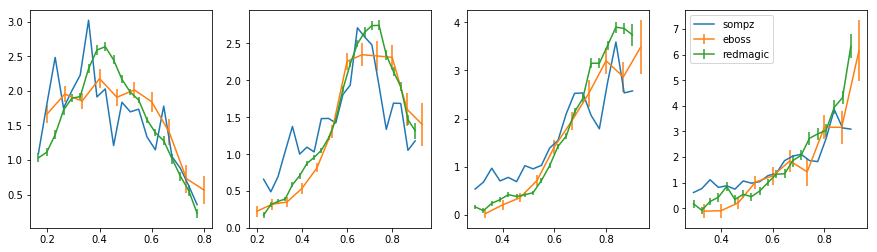

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
meanz_eboss = dict()


for i in range(4):
    print 'bin ', i

    int_sompz = np.trapz(nz_sompz_25bins[i][:24][mask_rm[i]], x = zbins_c[:24][mask_rm[i]])
    int_sompz15 = np.trapz(nz_sompz_15bins[i][:14], x = zbinse_c[:14])
    a = 1.#(int_sompz)
    print a 
    ax[i].plot(zbins_c[:24][mask_rm[i]], nz_sompz_25bins[i][:24][mask_rm[i]]/int_sompz, label = 'sompz')
    mask_eboss[i]
    ax[i].errorbar(zbinse_c[mask_eboss[i]], runs_eboss[0]['Nz'][i,:14,0][mask_eboss[i]]*a/(np.sqrt(runs_eboss[0]['bz'][i,:14,0][mask_eboss[i]]*measured_wz['th_correction_eboss'][mask_eboss[i]])*int_eboss[0][i]), cov_jck_eboss[0][i]['y3']['err'][:14][mask_eboss[i]]*a/(np.sqrt(measured_wz['th_correction_eboss'][mask_eboss[i]])*int_eboss[0][i]), label = 'eboss')
    #print zbinse_c[mask_eboss[i]]
    ax[i].errorbar(zbins_c[:24][mask_rm[i]], runs[0]['Nz'][i,:24,0][mask_rm[i]]/(np.sqrt(runs[0]['bz'][i,:24,0][mask_rm[i]]*measured_wz['th_correction'][mask_rm[i]])*integral[0][i]), cov_jck_rm[0][i]['y3']['err'][:24][mask_rm[i]]/(np.sqrt(measured_wz['th_correction'][mask_rm[i]])*integral[0][i]), label = 'redmagic')
    #print zbins_c[:24][mask_rm[i]]
    
plt.legend()

### eboss 25 bins 

bin  0
1.0
bin  1
1.0
bin  2
1.0
bin  3
1.0


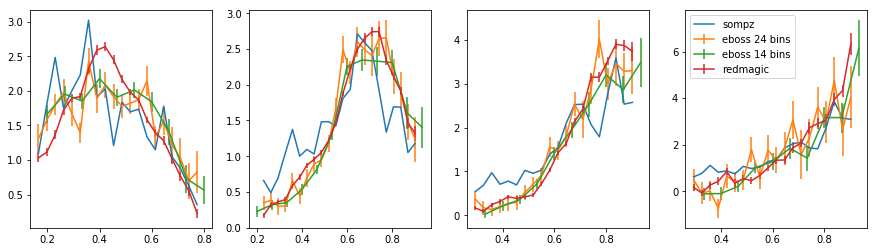

In [186]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
meanz_eboss = dict()


for i in range(4):
    print 'bin ', i

    int_sompz = np.trapz(nz_sompz_25bins[i][:24][mask_rm[i]], x = zbins_c[:24][mask_rm[i]])
    int_sompz15 = np.trapz(nz_sompz_15bins[i][:14], x = zbinse_c[:14])
    a = 1.#(int_sompz)
    print a 
    ax[i].plot(zbins_c[:24][mask_rm[i]], nz_sompz_25bins[i][:24][mask_rm[i]]/int_sompz, label = 'sompz')
    mask_eboss[i]
    ax[i].errorbar(zbins_c[:24][mask_rm[i]], runs[5]['Nz'][i,:24,0][mask_rm[i]]*a/(np.sqrt(runs[5]['bz'][i,:24,0][mask_rm[i]]*measured_wz['th_correction'][mask_rm[i]])*integral[5][i]), cov_jck_rm[5][i]['y3']['err'][:24][mask_rm[i]]*a/(np.sqrt(measured_wz['th_correction'][mask_rm[i]])*integral[5][i]), label = 'eboss 24 bins')
    #print zbinse_c[mask_eboss[i]]
    ax[i].errorbar(zbinse_c[mask_eboss[i]], runs_eboss[0]['Nz'][i,:14,0][mask_eboss[i]]*a/(np.sqrt(runs_eboss[0]['bz'][i,:14,0][mask_eboss[i]]*measured_wz['th_correction_eboss'][mask_eboss[i]])*int_eboss[0][i]), cov_jck_eboss[0][i]['y3']['err'][:14][mask_eboss[i]]*a/(np.sqrt(measured_wz['th_correction_eboss'][mask_eboss[i]])*int_eboss[0][i]), label = 'eboss 14 bins')
    
    ax[i].errorbar(zbins_c[:24][mask_rm[i]], runs[0]['Nz'][i,:24,0][mask_rm[i]]/(np.sqrt(runs[0]['bz'][i,:24,0][mask_rm[i]]*measured_wz['th_correction'][mask_rm[i]])*integral[0][i]), cov_jck_rm[0][i]['y3']['err'][:24][mask_rm[i]]/(np.sqrt(measured_wz['th_correction'][mask_rm[i]])*integral[0][i]), label = 'redmagic')
    #print zbins_c[:24][mask_rm[i]]
    
plt.legend()

In [97]:
for i in range(4):
    print '\nbin ', i
    #print 'meanz  ', meanz[i]['y3mean']
    print '--rm '
    print 'meanz2s', meanz[i]['y3mean_2s']
    print 'shifts ', meanz[i]['y3mean_2s']-meanz[i]['sompz_mean2s']
    print '--eboss'
    print 'meanz2s', meanz_eboss[i]['y3mean_2s']
    print 'shifts ', meanz_eboss[i]['y3mean_2s']-meanz_eboss[i]['sompz_mean2s']


bin  0
--rm 
meanz2s 0.4292798755103028
shifts  0.016062783921270973
--eboss
meanz2s 0.46925184968095757
shifts  0.04729503045863609

bin  1
--rm 
meanz2s 0.672324468019545
shifts  0.02999567401815728
--eboss
meanz2s 0.7184289345447575
shifts  0.056771799499124365

bin  2
--rm 
meanz2s 0.7649877928655746
shifts  0.03091731823795152
--eboss
meanz2s 0.8076087678645915
shifts  0.023549084429493106

bin  3
--rm 
meanz2s 0.7843996745608345
shifts  0.030355123200514034
--eboss
meanz2s 0.8633443170092567
shifts  0.03655799796130366


# small vs large scales

In [55]:
integral_large = np.zeros(4)
int_eboss_large = np.zeros(4)

for for i in range(4):
    integral_large[i] = np.trapz(runs[4]['Nz'][i,:24,0]/(np.sqrt(runs[4]['bz'][i,:24,0]*measured_wz['th_correction'])), x = zbins_c[:24] )
    int_eboss_large[i] = np.trapz(runs_eboss[4]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[4]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])), x = zbinse_c[:14] )


In [65]:
len(cov_jck_eboss[4][i]['y3']['err'])

15

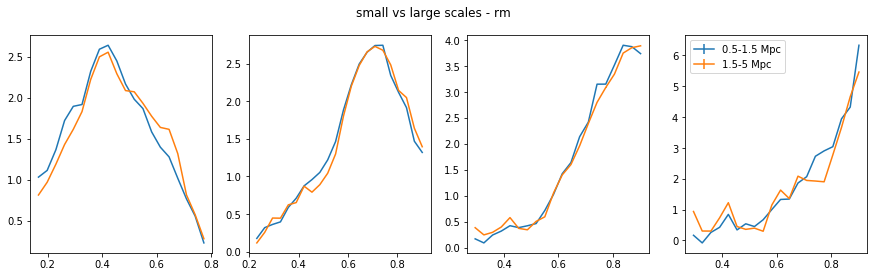

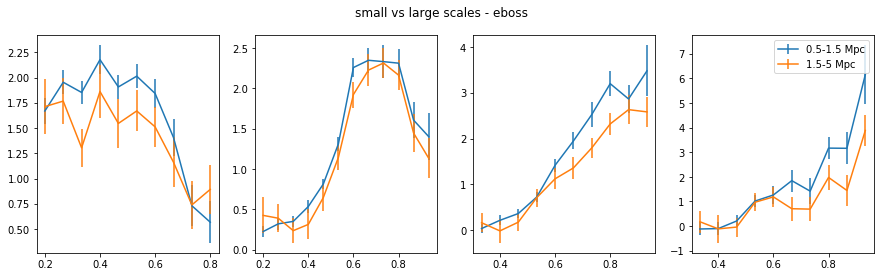

In [237]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    ax[i].errorbar(zbins_c[:24][mask_rm[i]], runs[0]['Nz'][i,:24,0][mask_rm[i]]/((np.sqrt(runs[0]['bz'][i,:24,0]*measured_wz['th_correction']))[mask_rm[i]]*integral[0][i]),    (cov_jck_rm[0][i]['y3']['err'][:24][mask_rm[i]]/(np.sqrt(measured_wz['th_correction'])[mask_rm[i]])*integral[0][i]),     label = '0.5-1.5 Mpc')
    ax[i].errorbar(zbins_c[:24][mask_rm[i]], runs[4]['Nz'][i,:24,0][mask_rm[i]]/((np.sqrt(runs[4]['bz'][i,:24,0]*measured_wz['th_correction']))[mask_rm[i]]*integral_large[i]), (cov_jck_rm[0][i]['y3']['err'][:24][mask_rm[i]]/(np.sqrt(measured_wz['th_correction'])[mask_rm[i]])*integral_large[i]) , label = '1.5-5 Mpc')
plt.suptitle('small vs large scales - rm ')
plt.legend()

fig, ax = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    ax[i].errorbar(zbinse_c[:14][mask_eboss[i]], runs_eboss[0]['Nz'][i,:14,0][mask_eboss[i]]/(np.sqrt(runs_eboss[0]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])[mask_eboss[i]]*int_eboss[0][i]), cov_jck_eboss[0][i]['y3']['err'][:14][mask_eboss[i]]/(np.sqrt(measured_wz['th_correction_eboss'])[mask_eboss[i]]*int_eboss[0][i]), label = '0.5-1.5 Mpc')
    ax[i].errorbar(zbinse_c[:14][mask_eboss[i]], runs_eboss[4]['Nz'][i,:14,0][mask_eboss[i]]/(np.sqrt(runs_eboss[4]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])[mask_eboss[i]]*int_eboss_large[i]), cov_jck_eboss[4][i]['y3']['err'][:14][mask_eboss[i]]/(np.sqrt(measured_wz['th_correction_eboss'])[mask_eboss[i]]*int_eboss_large[i]), label = '1.5-5 Mpc')
plt.suptitle('small vs large scales - eboss')
plt.legend()

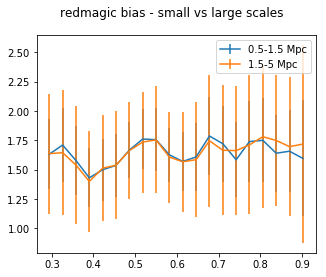

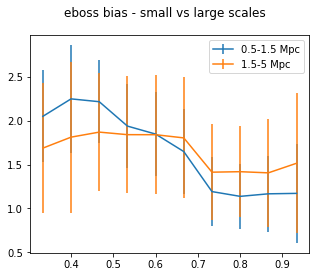

In [245]:
fig, ax = plt.subplots(figsize=(5,4))

intt = np.trapz(np.sqrt(runs[0]['bz'][0,:24,0]/measured_wz['th_correction'])[mask_rm[i]], x = zbins_c[:24][mask_rm[i]])
plt.errorbar(zbins_c[:24][mask_rm[i]], np.sqrt(runs[0]['bz'][0,:24,0]/measured_wz['th_correction'])[mask_rm[i]]/intt, np.sqrt(cov_bias_rm[0][0]['err']/measured_wz['th_correction'])[mask_rm[i]]/intt, label = '0.5-1.5 Mpc')
inte = np.trapz(np.sqrt(runs[4]['bz'][0,:24,0]/measured_wz['th_correction'])[mask_rm[i]], x = zbins_c[:24][mask_rm[i]])
plt.errorbar(zbins_c[:24][mask_rm[i]], np.sqrt(runs[4]['bz'][0,:24,0]/measured_wz['th_correction'])[mask_rm[i]]/inte, np.sqrt(cov_bias_rm[4][0]['err']/measured_wz['th_correction'])[mask_rm[i]]/inte, label = '1.5-5 Mpc')
plt.suptitle('redmagic bias - small vs large scales')
plt.legend()

fig, ax = plt.subplots(figsize=(5,4))
intt2 = np.trapz(np.sqrt(runs_eboss[0]['bz'][0,:14,0]/measured_wz['th_correction_eboss'])[mask_eboss[i]], x = zbinse_c[:14][mask_eboss[i]])
plt.errorbar(zbinse_c[:14][mask_eboss[i]], np.sqrt(runs_eboss[0]['bz'][0,:14,0]/measured_wz['th_correction_eboss'])[mask_eboss[i]]/intt2, np.sqrt(cov_bias_eboss[0][0]['err']/measured_wz['th_correction_eboss'])[mask_eboss[i]]/intt2, label = '0.5-1.5 Mpc')
inte2 = np.trapz(np.sqrt(runs_eboss[4]['bz'][0,:14,0]/measured_wz['th_correction_eboss'])[mask_eboss[i]], x = zbinse_c[:14][mask_eboss[i]])
plt.errorbar(zbinse_c[:14][mask_eboss[i]], np.sqrt(runs_eboss[4]['bz'][0,:14,0]/measured_wz['th_correction_eboss'])[mask_eboss[i]]/inte2, np.sqrt(cov_bias_eboss[4][0]['err']/measured_wz['th_correction_eboss'])[mask_eboss[i]]/inte2, label = '1.5-5 Mpc')
plt.suptitle('eboss bias - small vs large scales')
plt.legend()

## test weights and response function

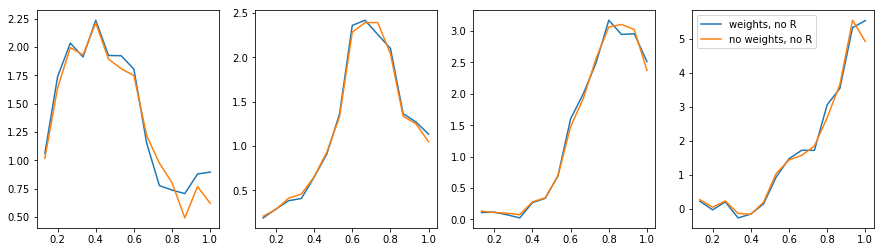

In [246]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    #ax[i].plot(zbinse_c, runs_eboss[0]['Nz'][i,:,0][:14]/(measured_wz['th_correction_eboss']**2*int_eboss[0][i]), label = 'weights, R no b')
    #ax[i].plot(zbins_c, runs_eboss[0]['Nz'][i,:,0][:14]/(inte_ebossgral[0][i]), label = 'weights, R no b')
    
    #ax[i].plot(zbinse_c, runs_eboss[0]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[0]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])*int_eboss[0][i]), label = 'weights, R')
    ax[i].plot(zbinse_c, runs_eboss[1]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[1]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])*int_eboss[1][i]), label = 'weights, no R')
    #ax[i].plot(zbinse_c, runs_eboss[2]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[2]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])*int_eboss[2][i]), label = 'no weights, R')
    ax[i].plot(zbinse_c, runs_eboss[3]['Nz'][i,:14,0]/(np.sqrt(runs_eboss[3]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])*int_eboss[3][i]), label = 'no weights, no R')

ax[3].legend()


In [ ]:
for i in range(4):
    print i 
    miao = dict()
    print 'w r ', compute_std(zbinse_c[:14], runs[0]['Nz'][i,:14,0]/(np.sqrt(runs[0]['bz'][i,:14,0]*measured_wz['th_correction_eboss'])))
    #print miao['y3mean'], miao['y3std']
    mask = (zbinse_c[:14] < (miao['y3mean']+2*miao['y3std'])) &  (zbins_c[:24] > (miao['y3mean']-2*miao['y3std']))
    #print mask, len(mask)
    miao['y3mean_2s'] = compute_mean(zbins_c[:24][mask], (runs[0]['Nz'][i,:24,0]/(np.sqrt(runs[0]['bz'][i,:24,0]*measured_wz['th_correction'])))[mask])
    b = np.zeros((100))
    for j in range(100):
        b[j] = compute_mean(zbins_c[:24][mask], (runs[0]['Nz'][i,:24,j+1]/(np.sqrt(runs[0]['bz'][i,:24,j+1]*measured_wz['th_correction'])))[mask]) 
    miao['y3mean_2s_err'] = covariance_scalar_jck(b,100,'jackknife')
    

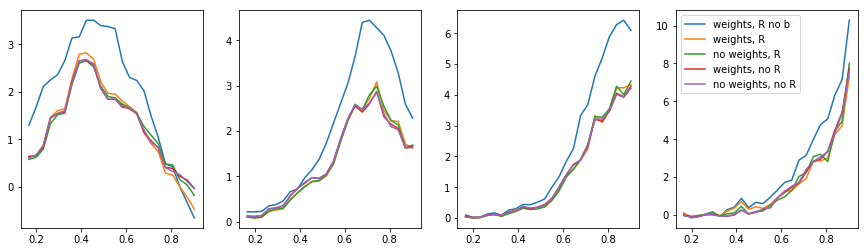

In [178]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    ax[i].plot(zbins_c[:24], runs[0]['Nz'][i,:,0][:24]/(measured_wz['th_correction']**2*integral[0][i]), label = 'weights, R no b')
    #ax[i].plot(zbins_c[:24], runs[0]['Nz'][i,:,0][:24]/(integral[0][i]), label = 'weights, R no b')
    
    ax[i].plot(zbins_c[:24], runs[0]['Nz'][i,:,0][:24]/(runs[0]['bz'][i,:24,0]*measured_wz['th_correction']*integral[0][i]), label = 'weights, R')
    ax[i].plot(zbins_c[:24], runs[1]['Nz'][i,:,0][:24]/(runs[1]['bz'][i,:24,0]*measured_wz['th_correction']*integral[1][i]), label = 'no weights, R')
    ax[i].plot(zbins_c[:24], runs[2]['Nz'][i,:,0][:24]/(runs[2]['bz'][i,:24,0]*measured_wz['th_correction']*integral[2][i]), label = 'weights, no R')
    ax[i].plot(zbins_c[:24], runs[3]['Nz'][i,:,0][:24]/(runs[3]['bz'][i,:24,0]*measured_wz['th_correction']*integral[3][i]), label = 'no weights, no R')

ax[3].legend()


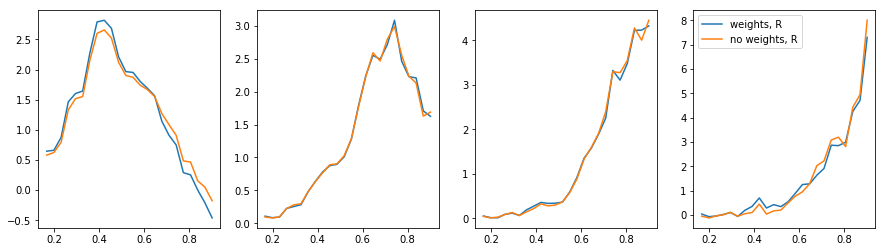

In [173]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    ax[i].plot(zbins_c[:24], runs[0]['Nz'][i,:,0][:24]/(runs[0]['bz'][i,:24,0]*measured_wz['th_correction']*integral[0][i]), label = 'weights, R')
    ax[i].plot(zbins_c[:24], runs[1]['Nz'][i,:,0][:24]/(runs[1]['bz'][i,:24,0]*measured_wz['th_correction']*integral[1][i]), label = 'no weights, R')

ax[3].legend()


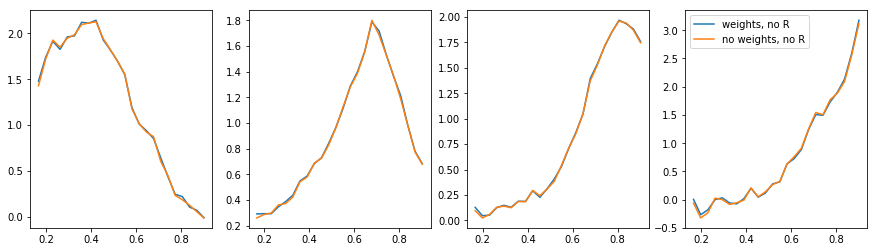

In [167]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    ax[i].plot(zbins_c[:24], runs[2]['Nz'][i,:,0][:24]/integral[2][i], label = 'weights, no R')
    ax[i].plot(zbins_c[:24], runs[3]['Nz'][i,:,0][:24]/integral[3][i], label = 'no weights, no R')

ax[3].legend()


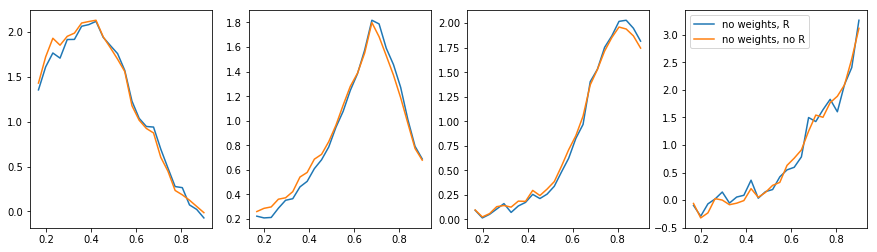

In [166]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    ax[i].plot(zbins_c[:24], runs[1]['Nz'][i,:,0][:24]/integral[1][i], label = 'no weights, R')
    ax[i].plot(zbins_c[:24], runs[3]['Nz'][i,:,0][:24]/integral[3][i], label = 'no weights, no R')

ax[3].legend()


In [193]:
integral.shape

(4, 4)

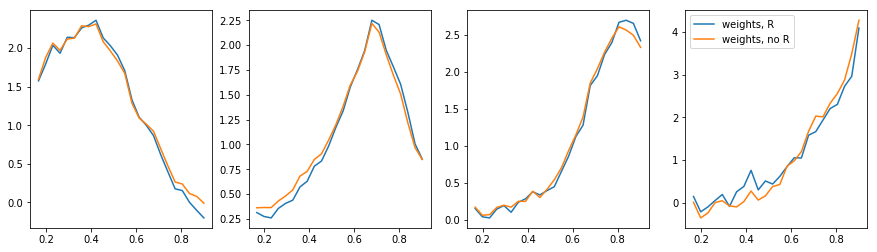

In [194]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    ax[i].plot(zbins_c[:24], runs[0]['Nz'][i,:,0][:24]/integral[0][i], label = 'weights, R')
    ax[i].plot(zbins_c[:24], runs[2]['Nz'][i,:,0][:24]/integral[2][i], label = 'weights, no R')
    
ax[3].legend()


# data vs simulations

In [98]:
measured_wz.keys()

['syst_mean_rm',
 'th_correction',
 'syst_mean_eboss',
 'mag_pos',
 'Nz_eboss',
 'bincenters_eboss',
 'shape_mode',
 'bincenters_rm',
 'mag_pos1',
 'alpha_mag_rm',
 'Nz_rm',
 'cross_cov',
 'bias_eboss',
 'th_correction_eboss',
 'syst_std_rm',
 'bias_rm']

In [254]:
'''
x redamagic *************************
systematics [ type_sims] [ tomo bin] [estimator] [key]
type_sims =0 -> spec z ref
type_sims =1 -> rmg z ref

estimator:
'bias_wl', 'bias_wl_full', 'w_br', 'w_br_bl', 'true'

x eboss **************************
systematics_eboss [ type_sims] [ tomo bin] [estimator]  [key]
type_sims =0 -> spec z ref default

estimator:
'bias_wl', 'bias_wl_full', 'w_br', 'w_br_bl', 'true'

'''

"\nx redamagic *************************\nsystematics [ type_sims] [ tomo bin] [estimator] [key]\ntype_sims =0 -> spec z ref\ntype_sims =1 -> rmg z ref\n\nestimator:\n'bias_wl', 'bias_wl_full', 'w_br', 'w_br_bl', 'true'\n\nx eboss **************************\nsystematics_eboss [ type_sims] [ tomo bin] [estimator]  [key]\ntype_sims =0 -> spec z ref default\n\nestimator:\n'bias_wl', 'bias_wl_full', 'w_br', 'w_br_bl', 'true'\n\n"

In [248]:
systematics = load_obj('./systematics')
systematics_eboss = load_obj('./systematics_eboss')

In [256]:
systematics[0][0]['w_br'].keys()

['std',
 'std_err',
 'truth_full',
 'mean_err',
 'final_jck',
 'final_full_jck',
 'mask',
 'final_full',
 'final',
 'z_ref',
 'dz',
 'truth',
 'dz_n',
 'mean']

In [264]:
systematics[1][0]['w_br']['final']

array([1.70752819, 1.80276889, 2.47483351, 3.02148751, 3.24147583,
       3.42043147, 3.6332434 , 3.44702069, 3.13443073, 2.26904533,
       1.53346795, 1.2025441 , 0.93051314, 0.5699467 ])

In [265]:
for i in range(3):
    print systematics[1][i]['w_br']['final']

[1.70752819 1.80276889 2.47483351 3.02148751 3.24147583 3.42043147
 3.6332434  3.44702069 3.13443073 2.26904533 1.53346795 1.2025441
 0.93051314 0.5699467 ]
[1.00643752 1.37211728 1.81846119 2.15607134 2.45760808 2.77199644
 3.03612762 3.10547773 2.96807256 2.80796422 2.5365526  2.30554886
 1.73231133 1.30965029 0.73764336]
[1.55282438 2.12575647 2.73569333 3.46181807 4.06866073 4.2377447
 4.6355174  4.1083201  3.70116986 2.79781429]


In [252]:
systematics_eboss[0].keys()

[0, 1, 2]

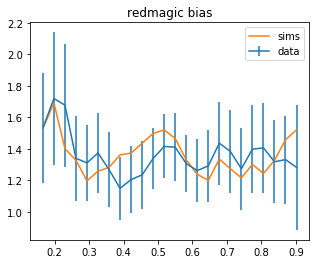

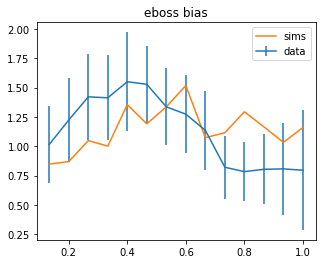

In [71]:
fig, ax = plt.subplots(figsize=(5,4))

intt = np.trapz(np.sqrt(runs[0]['bz'][0,:24,0]/measured_wz['th_correction']), x = zbins_c[:24])
ntt = np.trapz(measured_wz['bias_rm'][0][:,0], x = zbins_c[:24])
plt.errorbar(zbins_c[:24], np.sqrt(runs[0]['bz'][0,:24,0]/measured_wz['th_correction'])/intt, np.sqrt(cov_bias_rm[0][0]['err']/measured_wz['th_correction'])/intt, label = 'data')
plt.plot(zbins_c[:24], measured_wz['bias_rm'][0][:,0]/ntt, label = 'sims')
#plt.suptitle('small vs large scales')
plt.title('redmagic bias')
plt.legend()

fig, ax = plt.subplots( figsize=(5,4))



intt = np.trapz(np.sqrt(runs_eboss[0]['bz'][0,:14,0]/measured_wz['th_correction_eboss']), x = zbinse_c[:14])
ntt = np.trapz(measured_wz['bias_eboss'][0][:,0], x = zbinse_c[:14])
plt.errorbar(zbinse_c[:14], np.sqrt(runs_eboss[0]['bz'][0,:14,0]/measured_wz['th_correction_eboss'])/intt, np.sqrt(cov_bias_eboss[0][0]['err']/measured_wz['th_correction_eboss'])/intt, label = 'data')
plt.plot(zbinse_c[:14], measured_wz['bias_eboss'][0][:,0]/ntt, label = 'sims')
#plt.suptitle('small vs large scales')
plt.title('eboss bias')
plt.legend()